In [1]:
%reload_ext autoreload
%autoreload 2

# visualisation and data manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', 200)


# system and files managment
import os
import sys
import pickle
import ast
import collections
# import pyarrow as pa
# import pyarrow.parquet as pq

import warnings
warnings.filterwarnings('ignore')

In [2]:
# modules added to system path
path_tools = os.path.abspath(r'/Users/starignus/Documents/Programing/Practise_jobexam/FDA/Airbnb')
sys.path.extend([path_tools])

In [3]:
# exploring tools module
import tools.exploring_tools as mtool 

In [6]:
path_project = r'/Users/starignus/Documents/Programing/Practise_jobexam/FDA/'
path_input = os.path.join(path_project, 'Data', 'inputs')
data_set = os.path.join(path_input, 'extended_data_set.pickle')

In [7]:
df = pd.read_pickle(data_set)

In [2]:
a_test = [45, 40, 39, 37, 35, 33, 29, 27, 22, 19]
b_train = [33, 30, 27, 25, 22, 19, 15, 13, 10, 8]
boost_rounds = [200, 239, 300, 400, 298, 330, 352, 430, 230, 234]

In [13]:
boosters_mean = np.round(np.mean(boost_rounds))
boosters_mean

301.0

Text(0.5, 0, 'Grid-Search-Rounds')

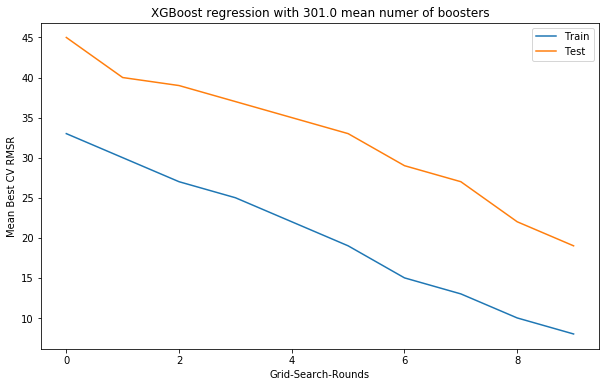

In [14]:
x_axis = range(0, len(a_test))
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x_axis, np.array(b_train), label='Train')
ax.plot(x_axis, np.array(a_test), label='Test')
ax.legend()
plt.ylabel('Mean Best CV RMSR')
plt.title('XGBoost Regression with {} mean numer of boosters'.format(boosters_mean))
plt.xlabel('Grid-Search-Rounds')

In [16]:
def grid_serch_rouunds(min_test_err, min_train_err, boost_rounds_list, y_limit=None):
    boosters_mean = np.round(np.mean(boost_rounds))
    x_axis = range(0, len(a_test))
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(x_axis, np.array(b_train), label='Train')
    ax.plot(x_axis, np.array(a_test), label='Test')
    ax.legend()
    plt.ylabel('Mean Best CV RMSR')
    plt.title('XGBoost Regression with {} mean numer of boosters'.format(boosters_mean))
    plt.xlabel('Grid-Search-Rounds')
    if y_lim is not None:
        plt.ylim(y_lim)

In [8]:
list_var_GA = ['latitude', 'longitude', 'accommodates', 'bedrooms', 'maximum_nights',
       'availability_30', 'bathrooms_shared', 'room_type_num', 'tv',
       'hot_water', 'dishwasher', 'cable_tv']

In [9]:
corr_spear_2 = df[list_var_GA + ['price_log']].corr(method='spearman').abs()

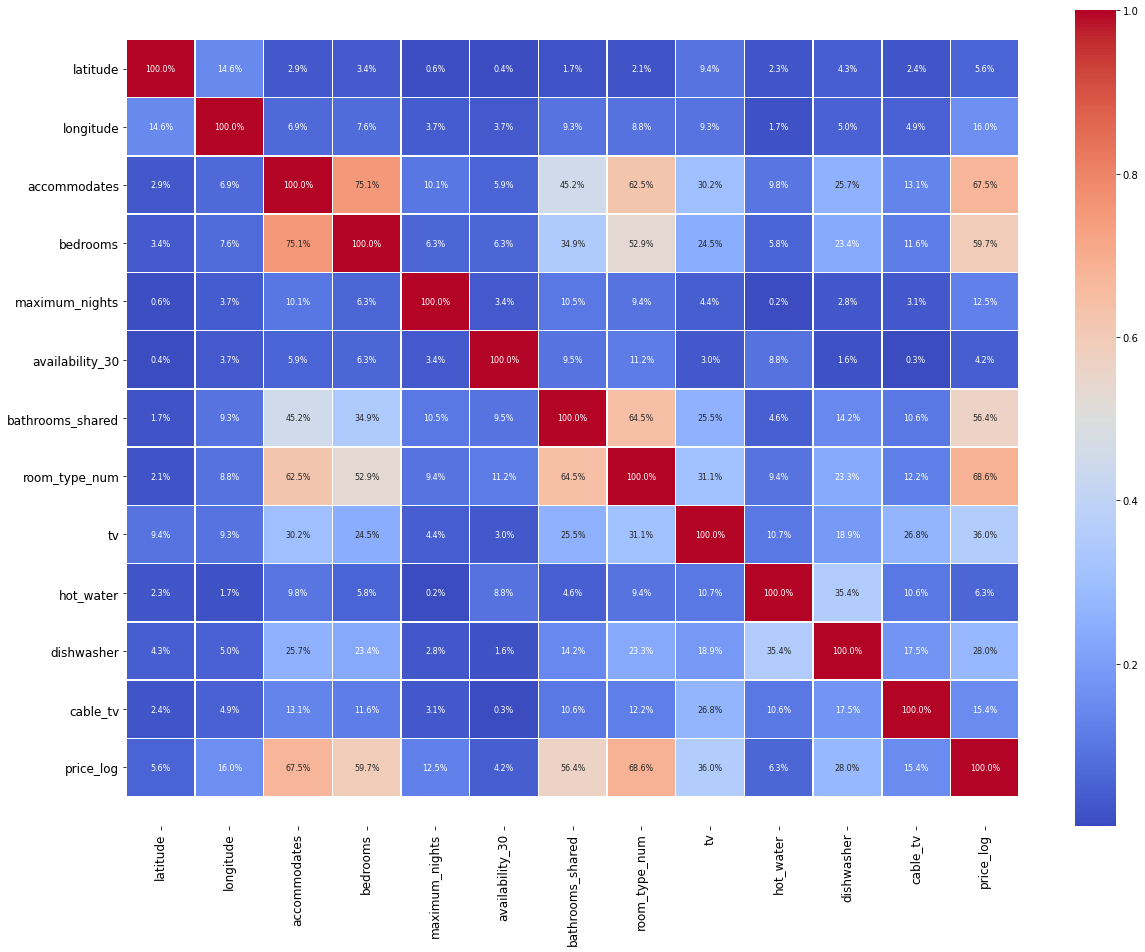

In [11]:
mtool.heat_map_corr(corr_spear_2, cmap='coolwarm', square=False, annot=True)